In this project, I used data from the Top 100 Spotify Tracks of 2018. I began by loading the dataset and reviewing the columns to understand what features were available for analysis.

In [1]:
import pandas as pd

df = pd.read_csv('top2018.csv')

df.head(100)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.3570,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.4730,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.1400,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.4390,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.3500,91.030,217925.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,10.0,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,217440.0,4.0
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,3.0,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,205748.0,4.0
97,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,0.0,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,260000.0,5.0
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,239000.0,4.0


After a quick overview, I moved into exploratory data analysis (EDA) to better understand the distributions and potential relationships in the dataset. My first hypothesis was: “Is there a relationship between loudness and danceability in popular songs?”

EDA

In [2]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  duration_ms       100 non-null    float64
 15  time_signature    100 non-null    float64
dtypes: float64(13), object(3)
memory usage: 12.6+

In [4]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


HYPOTHESIS 1

To investigate this, I created two histograms — one for danceability and another for loudness. Initially, the similarity in the curves led me to believe there might be a correlation between the two.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
danceability_mean = df['danceability'].mean()
df['is_danceable'] = (df['danceability'] > danceability_mean).astype(int)

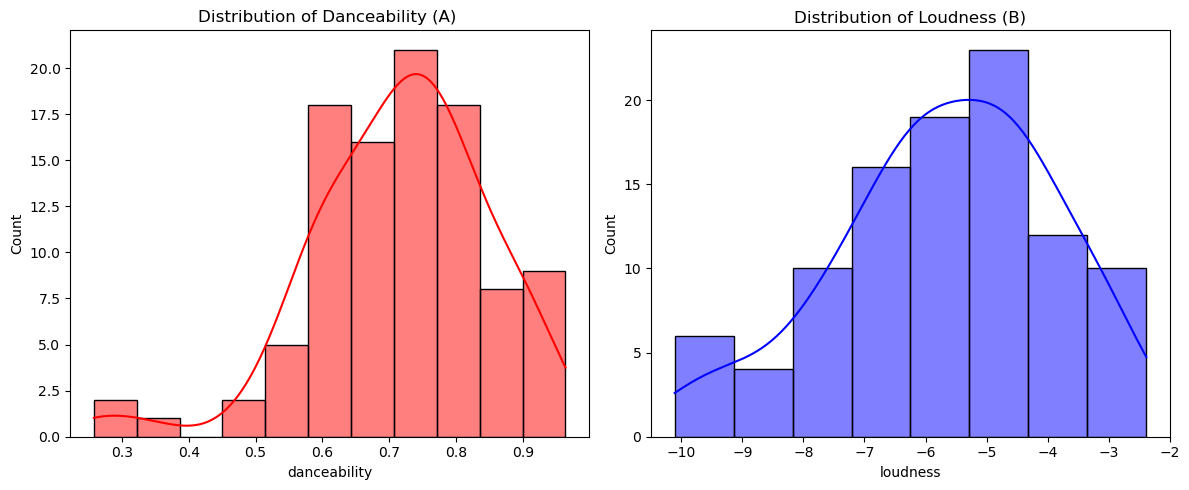

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['danceability'], kde=True, color='red')
plt.title('Distribution of Danceability (A) ')

plt.subplot(1,2,2)
sns.histplot(df['loudness'], kde=True, color='blue')
plt.title('Distribution of Loudness (B)')

plt.tight_layout()
plt.show()


To test this, I trained a Random Forest Classifier to predict whether a song would be danceable based on loudness and other features. The model was evaluated on 20% of the data (80 was used to train the model) and achieved an accuracy of 0.65 — correctly predicting 13 out of 20 cases. Which was quite poor.

In [8]:
features = ['loudness', 'energy', 'tempo', 'valence', 'speechiness']

In [9]:
X = df[features]
y = df['is_danceable']

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.80      0.62      0.70        13

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



This performance suggested that the correlation might not be as strong as I initially assumed. To verify this, I generated a correlation heatmap, which confirmed that the relationship between loudness and danceability was weaker than expected.

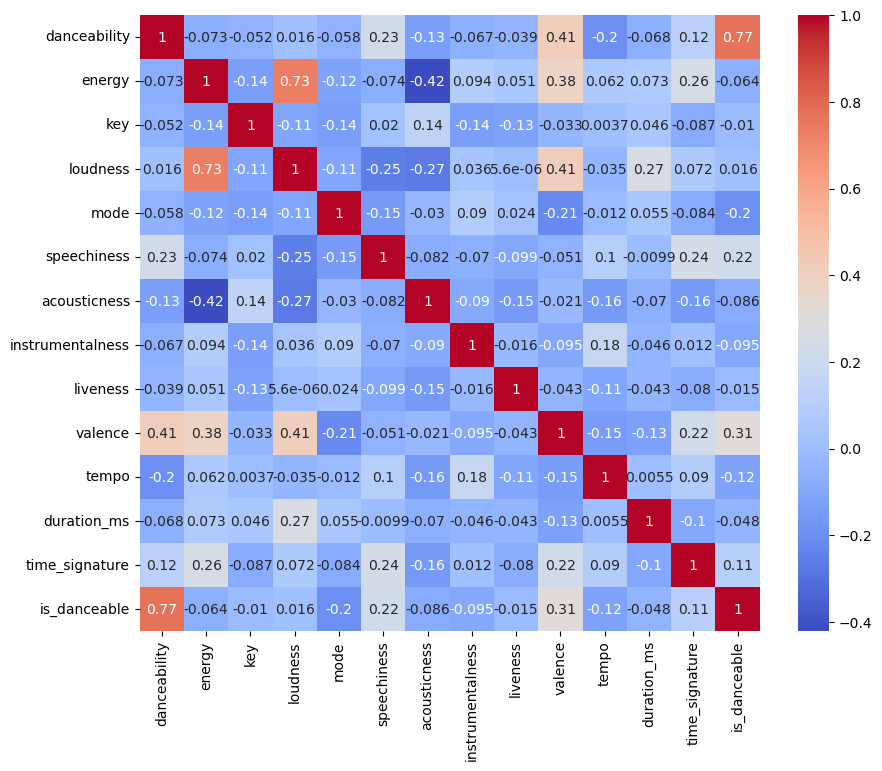

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


HYPOTHESIS 2

Next, I explored other potential patterns using additional histograms and pair plots. One more promising relationship appeared between loudness and energy.

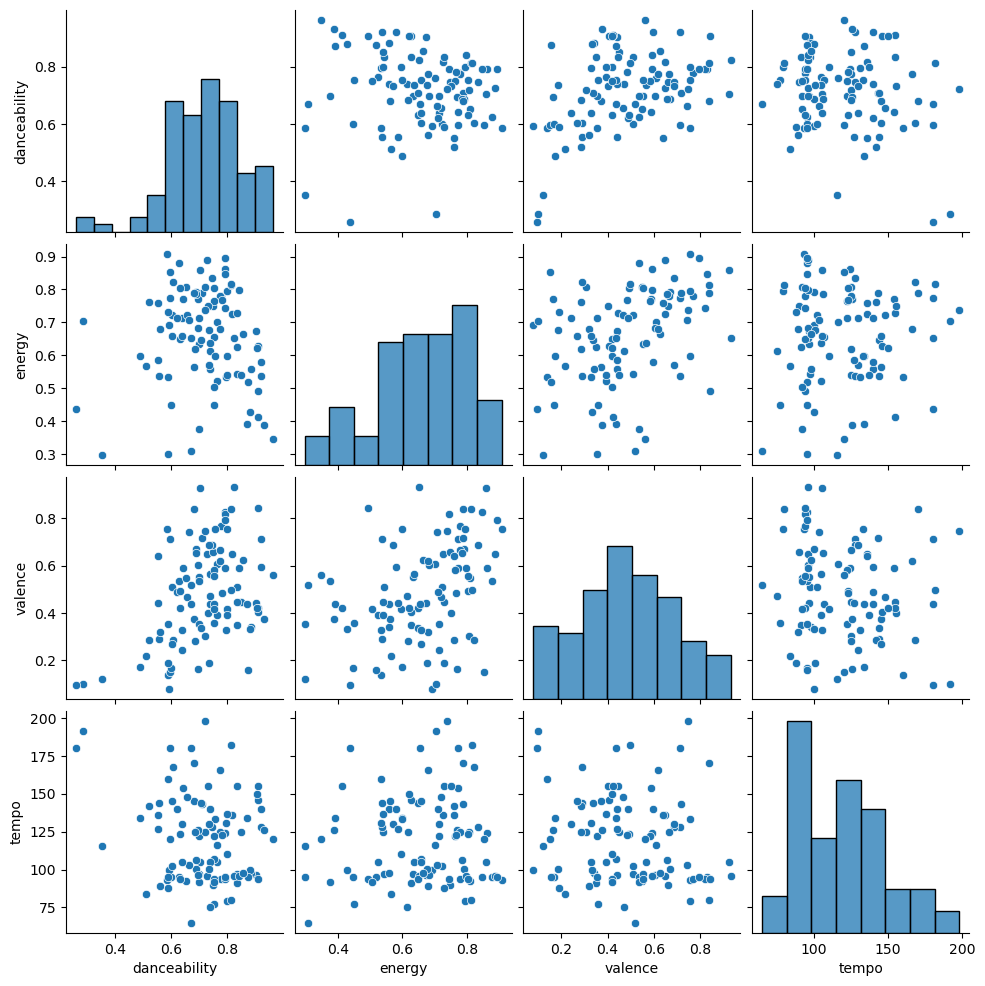

In [12]:
sns.pairplot(df[['danceability', 'energy', 'valence', 'tempo']])


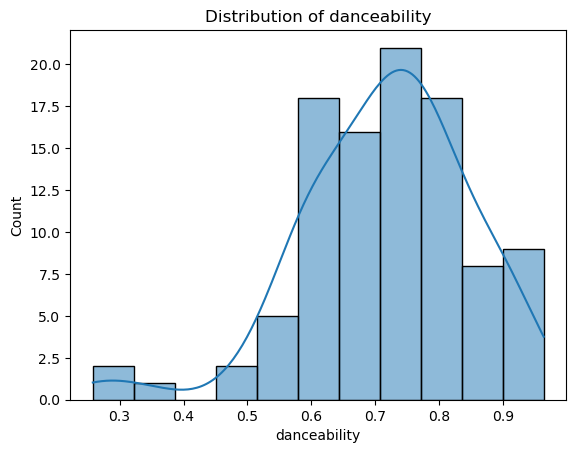

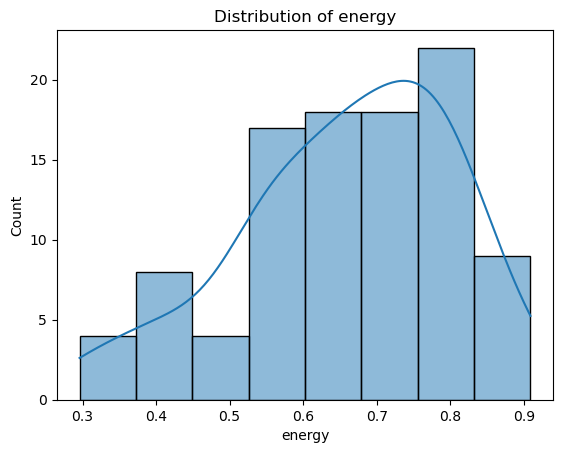

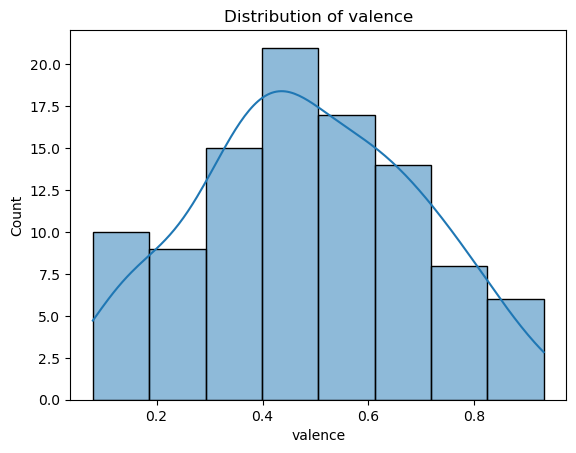

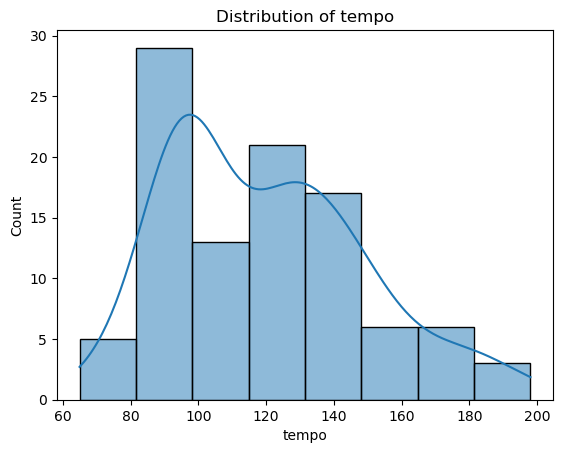

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['danceability', 'energy', 'valence', 'tempo']

for feature in features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


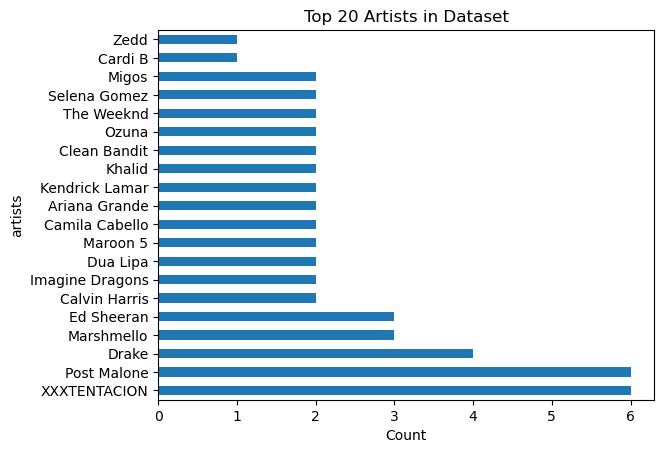

In [14]:
top_artists = df['artists'].value_counts().head(20)
top_artists.plot(kind='barh')
plt.title('Top 20 Artists in Dataset')
plt.xlabel('Count')
plt.show()


This led to a second hypothesis:
“Can loudness be used to predict a song’s energy level?”

To explore this, I created a scatter plot of energy vs. loudness. The plot showed a clear positive trend, suggesting a potential linear relationship.

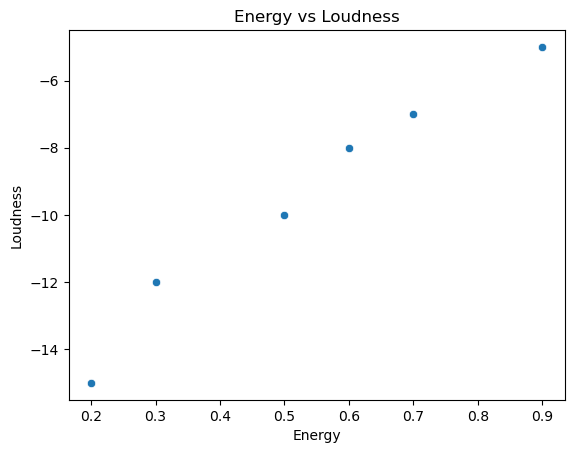

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


data = pd.DataFrame({
    'energy': [0.2, 0.5, 0.7, 0.9, 0.3, 0.6],
    'loudness': [-15, -10, -7, -5, -12, -8]
})

sns.scatterplot(x='energy', y='loudness', data=data)
plt.title('Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

In [16]:
correlation = df['energy'].corr(df['loudness'])
print(f"Correlation between energy and loudness: {correlation:.2f}")


Correlation between energy and loudness: 0.73


I then trained a Linear Regression model, using loudness as the independent variable and energy as the dependent variable. Again, I used an 80/20 split for training and testing. The model's performance was evaluated using Mean Squared Error (MSE) — and the results were much more promising compared to the first hypothesis.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['energy']]
y = df['loudness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Model Coefficient: {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


Mean Squared Error: 1.98
Model Coefficient: 9.16
Model Intercept: -11.70


To visualize the model's accuracy, I plotted the predicted vs. actual energy values. In an ideal scenario, all points would fall along the line y = x, representing perfect predictions.

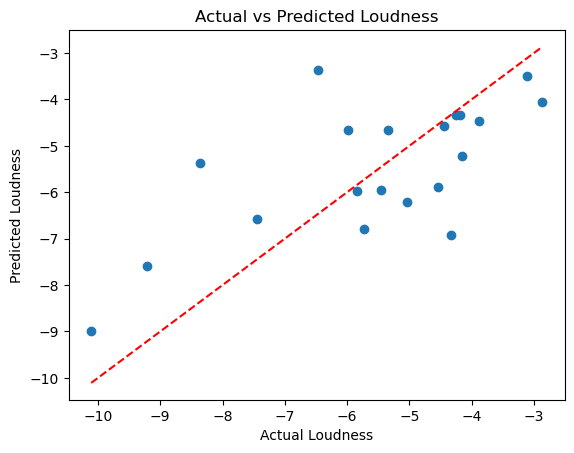

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Loudness")
plt.ylabel("Predicted Loudness")
plt.title("Actual vs Predicted Loudness")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.show()
